## 115 - Declarative Station Plots

[Youtube](https://www.youtube.com/watch?v=3sRi4eSg52U)

In [1]:
from siphon.catalog import TDSCatalog

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')
cat.datasets

['metar_20221026_0000.txt', 'metar_20221026_0100.txt', 'metar_20221026_0200.txt', 'metar_20221026_0300.txt', 'metar_20221026_0400.txt', 'metar_20221026_0500.txt', 'metar_20221026_0600.txt', 'metar_20221026_0700.txt', 'metar_20221026_0800.txt', 'metar_20221026_0900.txt', 'metar_20221026_1000.txt', 'metar_20221026_1100.txt', 'metar_20221026_1200.txt', 'metar_20221026_1300.txt', 'metar_20221026_1400.txt', 'metar_20221026_1500.txt', 'metar_20221026_1600.txt', 'metar_20221026_1700.txt', 'metar_20221026_1800.txt', 'metar_20221026_1900.txt', 'metar_20221026_2000.txt', 'metar_20221026_2100.txt', 'metar_20221026_2200.txt', 'metar_20221026_2300.txt', 'metar_20221027_0000.txt', 'metar_20221027_0100.txt', 'metar_20221027_0200.txt', 'metar_20221027_0300.txt', 'metar_20221027_0400.txt', 'metar_20221027_0500.txt', 'metar_20221027_0600.txt', 'metar_20221027_0700.txt', 'metar_20221027_0800.txt', 'metar_20221027_0900.txt', 'metar_20221027_1000.txt', 'metar_20221027_1100.txt', 'metar_20221027_1200.txt', 

In [3]:
ds = cat.datasets[0]
ds.download()

In [4]:
from metpy.io import parse_metar_file

In [5]:
ds.name

'metar_20221026_0000.txt'

In [6]:
df = parse_metar_file(ds.name)
df.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KC62,KC62,41.47,-85.27,306.0,2022-11-25 23:55:00,170.0,4.0,NaN,16093.44,NaN,...,16.0,16.0,29.69,0,0,0,AO2 P0001 T01600160,1005.40,-0.694593,3.939231
KMCX,KMCX,40.72,-86.77,206.0,2022-11-25 23:55:00,130.0,5.0,NaN,16093.44,UP,...,16.0,15.0,29.64,141,0,0,AO2 P0003 60056 T01580150 10176 20158,1003.83,-3.830222,3.213938
KRID,KRID,39.75,-84.85,348.0,2022-11-25 23:55:00,140.0,8.0,NaN,16093.44,NaN,...,19.0,13.0,29.70,0,0,0,AO2,1005.26,-5.142301,6.128356
KW75,KW75,37.60,-76.45,9.0,2022-11-25 23:55:00,0.0,0.0,NaN,16093.44,NaN,...,15.0,14.0,30.00,0,0,0,AO1 T01500140 10160 20150,1016.22,-0.000000,-0.000000
KGPH,KGPH,39.33,-94.32,235.0,2022-11-25 23:55:00,330.0,8.0,NaN,16093.44,NaN,...,11.0,1.0,29.87,0,0,0,AO2,1012.12,4.000000,-6.928203


In [7]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs

from metpy.plots.declarative import *
from metpy.units import units

In [8]:
df.units

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'wind_gust': 'kts',
 'visibility': 'meters',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'current_wx1_symbol': None,
 'current_wx2_symbol': None,
 'current_wx3_symbol': None}

In [9]:
df['tempf'] = (df.air_temperature.values * units.degC).to('degF')
df['tempf']

station_id
KC62    60.8
KMCX    60.8
KRID    66.2
KW75    59.0
KGPH    51.8
        ... 
LPMR    62.6
LPMT    66.2
VCCC     NaN
KHQZ    69.8
MBPV    77.0
Name: tempf, Length: 8942, dtype: float64

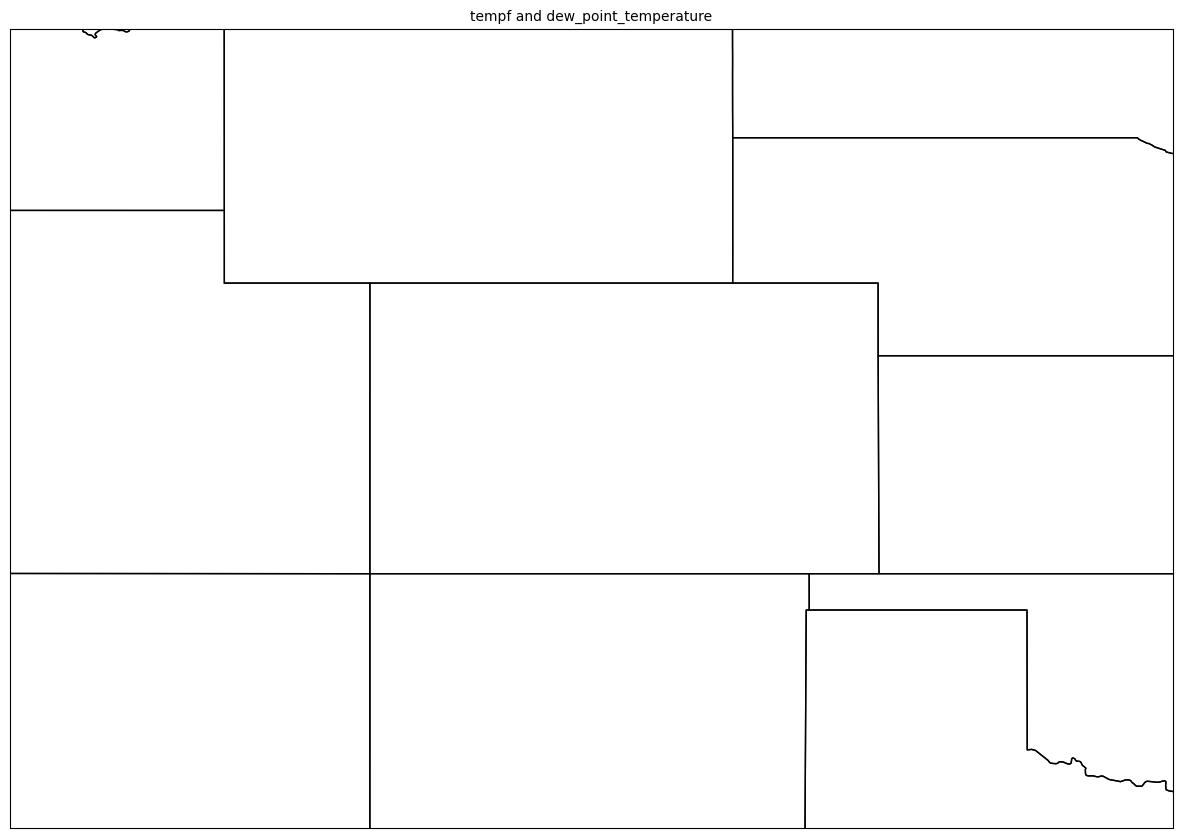

In [10]:
obs = PlotObs()
obs.data = df
obs.time = datetime.utcnow()
obs.level = None
obs.fields = ['tempf', 'dew_point_temperature']
obs.locations = ['NW', 'SW']
obs.colors = ['tab:red', 'tab:green']
obs.formats = [None, None]
obs.vector_field = ['eastward_wind', 'northward_wind']
obs.reduce_points = 0.5

panel = MapPanel()
panel.area = 'co'
panel.projection = ccrs.PlateCarree()
panel.layers = ['coastline', 'borders', 'states']

panel.plots = [obs]

pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

pc.show()